In [1]:
import numpy as np
from sklearn.datasets import make_blobs

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

## Dataset

In [2]:
(X, y) = make_blobs(n_samples = 200, centers = [[-1,-1], [5,5]], center_box=(-10, 10))
y[y==0] = -1 # Our labels are {1, -1}

In [3]:
print("Shape of input  :",X.shape)
print("Shape of labels :",y.shape)

Shape of input  : (200, 2)
Shape of labels : (200,)


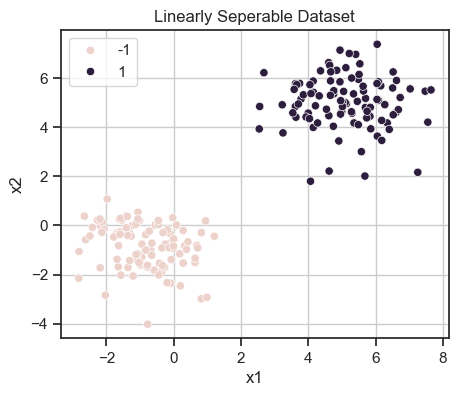

In [4]:
plt.figure(figsize=(5,4))
_ = sns.scatterplot(x=X[:, 0], y = X[:, 1], hue = y)
plt.gca().set(title='Linearly Seperable Dataset', xlabel='x1', ylabel = 'x2')
plt.grid()

## SVC Model

### Defining the Hinge 
The popular loss function that originiated from the deriviation of soft-margin SVC, is given by
$$\text{Hinge Loss} = \max(0, 1-y \times (w \cdot x - b))$$

### The implementation of the SVM in the Primal Form

In [5]:
class SVC:
    def __init__(self, input_dim=2, C = 100, max_iter = 1000, lr = 1e-3, tol = 1e-4):
        self.w = np.random.normal(size=(input_dim))
        self.b = np.random.normal(size=(1))
        self.C = C
        self.max_iter = 1000
        self.lr = lr
        self.tol = tol

    def predict(self, x, batch=True):
        if batch: return x @ self.w - self.b
        return self.w.T @ x.reshape(-1,1) - self.b

    def compute_loss(self, y, pred):
        weight_regularizer = 0.5*(np.linalg.norm(self.w))**2
        hinge_loss = svc.C * (1 - y * pred)
        mask = (1 - y * pred) < 0
        hinge_loss[mask] = 0
        loss = np.mean(hinge_loss) + weight_regularizer
        return loss, mask

    def compute_grad_(self, x, y, mask):
        gradW = self.C * (y.reshape(-1,1) * x)
        gradW[mask] = 0
        
        gradB = self.C*y
        gradB[mask] = 0
        return np.mean(-gradW), np.mean(gradB)

    def update_(self, gradW, gradB):
        self.w = self.w - self.lr * (gradW + self.w)
        self.b = self.b - self.lr * gradB
        return 
        
    def fit(self, X, y):
        x, y = X.copy(), y.copy()
        idx = np.arange(0, X.shape[0])
        prev_loss = None
        for _ in range(self.max_iter):
            x, y = x[idx], y[idx]
            pred = self.predict(x) # Predict
            loss, mask = self.compute_loss(y, pred) # Compute hinge loss
            if prev_loss is not None and (prev_loss - loss < self.tol):
                print(f"Converged in {_} iterations")
                break

            gradW, gradB = self.compute_grad_(x, y, mask)
            self.update_(gradW, gradB)
            np.random.shuffle(idx)
            prev_loss = loss

In [6]:
svc = SVC(C = 100, lr = 1e-3, max_iter = 5000)

In [7]:
svc.fit(X, y)

Converged in 370 iterations


In [8]:
pred = svc.predict(X, batch=True)
pred[pred > 0] = 1
pred[pred < 0] = -1
print(f"Accuracy : {(pred==y).sum()}")

Accuracy : 200


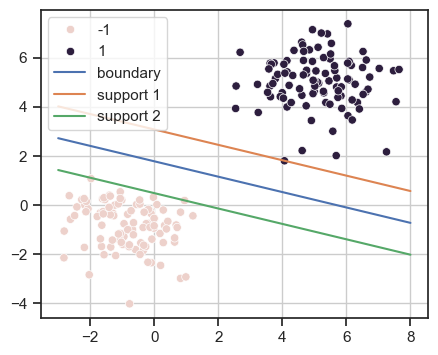

In [9]:
x_ = np.linspace(-3, 8)
y_ = (svc.b-svc.w[0]*x_)/svc.w[1]

y_1 = (svc.b-svc.w[0]*x_+1)/svc.w[1]
y_2 = (svc.b-svc.w[0]*x_-1)/svc.w[1]

plt.figure(figsize=(5,4))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)
sns.lineplot(x = x_, y = y_, label = 'boundary')
sns.lineplot(x = x_, y = y_1, label = 'support 1')
sns.lineplot(x = x_, y = y_2, label = 'support 2')
plt.grid()